In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
classes = ['baroque', 'gothic', 'islamic', 'modernist', 'neoclassical', 'renaissance', 'romanesque', 'tudor', 'victorian']
path = Path('data')

In [4]:
#np.random.seed(0)
#data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#                                  ds_tfms=get_transforms(), size=224,
#                                  num_workers=4).normalize(imagenet_stats)

In [5]:
np.random.seed(0)
data = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv',
                               ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [6]:
data.classes

['baroque',
 'gothic',
 'islamic',
 'modernist',
 'neoclassical',
 'renaissance',
 'romanesque',
 'tudor',
 'victorian']

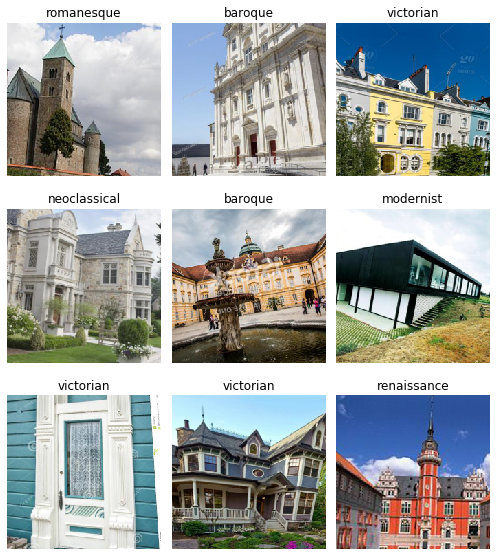

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baroque',
  'gothic',
  'islamic',
  'modernist',
  'neoclassical',
  'renaissance',
  'romanesque',
  'tudor',
  'victorian'],
 9,
 1161,
 290)

In [9]:
learn = cnn_learner(data, models.densenet121, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.745807,1.115280,0.348276,00:35
1,1.937325,1.098364,0.362069,00:22
2,1.505149,1.011205,0.344828,00:22
3,1.205654,0.965567,0.327586,00:22


In [11]:
learn.save('stage-1-densenet121')

In [12]:
learn.load('stage-1-densenet121')

Learner(data=ImageDataBunch;

Train: LabelList (1161 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tudor,tudor,tudor,tudor,tudor
Path: data;

Valid: LabelList (290 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
neoclassical,renaissance,victorian,islamic,islamic
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


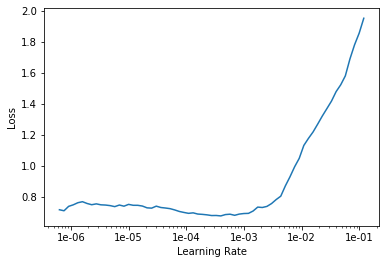

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(6, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.784743,0.922193,0.303448,00:28
1,0.687879,0.893831,0.293103,00:27
2,0.615542,0.898971,0.244828,00:27
3,0.550051,0.896737,0.255172,00:28
4,0.478994,0.897980,0.258621,00:28
5,0.422348,0.892820,0.251724,00:27


In [17]:
learn.save('stage-2-densenet121')

In [18]:
learn.load('stage-2-densenet121')

Learner(data=ImageDataBunch;

Train: LabelList (1161 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tudor,tudor,tudor,tudor,tudor
Path: data;

Valid: LabelList (290 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
neoclassical,renaissance,victorian,islamic,islamic
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

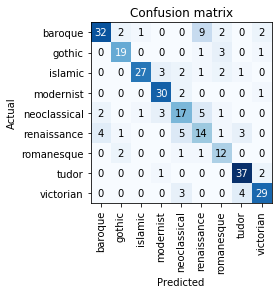

In [20]:
interp.plot_confusion_matrix()